In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


%matplotlib inline

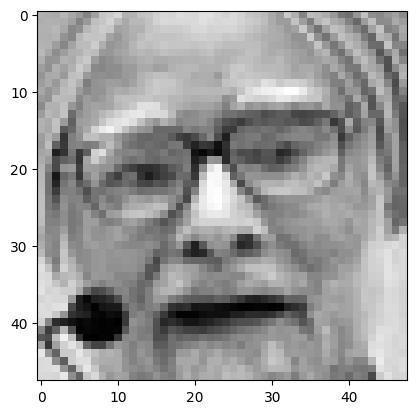

In [2]:
img = np.asarray(Image.open('./images/train/angry/1.jpg'))
imgplot = plt.imshow(img, cmap='gray') 

In [3]:
import pathlib
data_dir = pathlib.Path('./images/images')
image_count = len(list(data_dir.glob('*/*/*.jpg')))
image_count

35887

In [4]:
img1 = Image.open('./images/train/sad/3.jpg')
img1.size

(48, 48)

In [15]:
batch_size = 64
img_height = 48 
img_width = 48

In [16]:
data_dir_train = pathlib.Path('./images/images/train')
data_dir_val = pathlib.Path('./images/images/validation')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(data_dir_train,
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(data_dir_val,
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [18]:
num_classes = 7

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling, Input, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
vggnet = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.2),

    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2, padding='same'),

    Flatten(),
    Dense(units=4096, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dropout(0.2),
    Dense(units=num_classes, activation='softmax')
])


In [21]:
vggnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 34,611,655 (132.03 MB)

 Trainable params: 34,609,095 (132.02 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

vggnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', AUC(curve='ROC')])

In [23]:
from tensorflow.python.client import device_lib 

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 286232371265597988
xla_global_id: -1
]


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 50

vggnet.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[ModelCheckpoint('vggnet.keras', monitor='val_accuracy', save_best_only=True, mode='max')]
)

Epoch 1/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.2289 - auc_1: 0.6338 - loss: 2.4643 - val_accuracy: 0.2586 - val_auc_1: 0.6242 - val_loss: 1.8282
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 581s 1s/step - accuracy: 0.2454 - auc_1: 0.6622 - loss: 1.7944 - val_accuracy: 0.1380 - val_auc_1: 0.6055 - val_loss: 1.8397
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.2489 - auc_1: 0.6689 - loss: 1.7847 - val_accuracy: 0.2617 - val_auc_1: 0.6628 - val_loss: 1.8267
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.2694 - auc_1: 0.6800 - loss: 1.7709 - val_accuracy: 0.1928 - val_auc_1: 0.6356 - val_loss: 1.9425
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.3173 - auc_1: 0.7117 - loss: 1.7144 - val_accuracy: 0.2965 - val_auc_1: 0.6808 - val_loss: 1.7894
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.3729 - auc_1: 0.7558 - loss: 1.6160 - val_accuracy: 0.3767 - val_auc_1: 0.7500 - val_loss: 1.6555
Epoch 7/50

In [16]:
import tensorflow as tf

model = tf.keras.models.load_model('vggnet.keras')

In [18]:
img = np.asarray(Image.open('./images/train/angry/1.jpg'))
img = img[np.newaxis, :, :, np.newaxis]
img.shape


(1, 48, 48, 1)

In [21]:
pred = model.predict(img)
np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


0